In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sentiment_df = pd.read_csv('fear_greed_index.csv')
trader_df = pd.read_csv('historical_data.csv')

<ipython-input-2-99bd8897e1c0>:2: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  trader_df = pd.read_csv('historical_data.csv')


In [3]:
# preprocess timestanp

sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])
trader_df['trade_date'] = pd.to_datetime(trader_df['Timestamp IST'], format="%d-%m-%Y %H:%M")
trader_df['trade_date'] = trader_df['trade_date'].dt.date
sentiment_df['date'] = sentiment_df['date'].dt.date

In [4]:
sentiment_df

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05
...,...,...,...,...
2639,1745818200,54,Neutral,2025-04-28
2640,1745904600,60,Greed,2025-04-29
2641,1745991000,56,Greed,2025-04-30
2642,1746077400,53,Neutral,2025-05-01


In [5]:
trader_df

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,trade_date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.000000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.000000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.000000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.000000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.000000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177268,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,HYPE,14.6660,1.37,20.09,SELL,10-03-2025 06:26,5567.740000,Close Long,0.360036,0x1fab427a8e5d88e9c0d7041f3eb2af0202f1005100da...,7.854117e+10,True,0.006027,4.080000e+14,1.740000e+12,2025-03-10
177269,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,HYPE,14.6650,1.65,24.20,SELL,10-03-2025 06:26,5566.370000,Close Long,0.431970,0x1fab427a8e5d88e9c0d7041f3eb2af0202f1005100da...,7.854117e+10,True,0.007259,6.990000e+14,1.740000e+12,2025-03-10
177270,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,HYPE,14.6640,34.81,510.45,SELL,10-03-2025 06:26,5564.720000,Close Long,9.078448,0x1fab427a8e5d88e9c0d7041f3eb2af0202f1005100da...,7.854117e+10,True,0.153136,4.590000e+14,1.740000e+12,2025-03-10
177271,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,HYPE,14.6640,34.10,500.04,SELL,10-03-2025 06:26,5529.910000,Close Long,8.893280,0x1fab427a8e5d88e9c0d7041f3eb2af0202f1005100da...,7.854117e+10,True,0.150012,9.300000e+14,1.740000e+12,2025-03-10


In [6]:
# Merge Sentiment with Trader Data

merged_df = trader_df.merge(sentiment_df[['date', 'classification']], left_on='trade_date', right_on='date', how='left')

In [7]:
# Aggregate Trader Performance by Sentiment

agg_metrics = merged_df.groupby('classification').agg({
    'Closed PnL': ['mean', 'sum'],
    'Size USD': 'sum',
    'Account': pd.Series.nunique
}).reset_index()

agg_metrics.columns = ['Sentiment', 'Avg Closed PnL', 'Total Closed PnL',
                       'Total Traded Volume (USD)', 'Unique Traders']
print(agg_metrics)

       Sentiment  Avg Closed PnL  Total Closed PnL  Total Traded Volume (USD)  \
0   Extreme Fear       28.163756      4.650681e+05               8.843665e+07   
1  Extreme Greed       69.284226      2.623309e+06               1.170575e+08   
2           Fear       58.712691      2.808698e+06               4.248703e+08   
3          Greed       35.492668      1.594082e+06               2.582443e+08   
4        Neutral       42.709971      1.287236e+06               1.572629e+08   

   Unique Traders  
0              27  
1              25  
2              27  
3              26  
4              26  


<ipython-input-8-8805bd10a961>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=agg_metrics, x='Sentiment', y='Avg Closed PnL', palette='viridis')


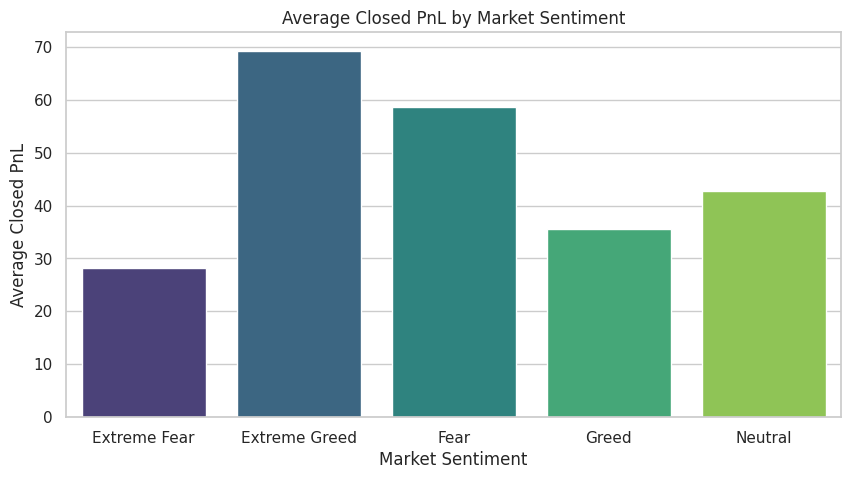

In [8]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
sns.barplot(data=agg_metrics, x='Sentiment', y='Avg Closed PnL', palette='viridis')
plt.title('Average Closed PnL by Market Sentiment')
plt.ylabel('Average Closed PnL')
plt.xlabel('Market Sentiment')
plt.show()